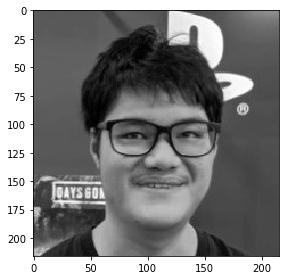

In [2]:
import  skimage as sk
from skimage import io
import skimage.transform as tr
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from skimage import img_as_ubyte
from skimage.transform import rescale, resize, downscale_local_mean





c = io.imread('result (Custom).jpg')
io.imshow(c)



C:\Users\choug\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


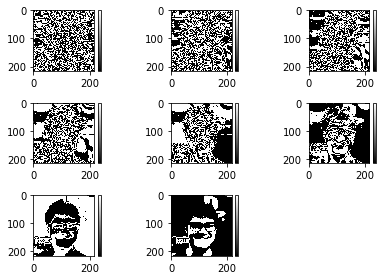

In [3]:
#bit map



#把每個pixel的各個bit取出來組成圖
bps=[(c>>i)%2 for i in range(8)]
for i in range(8):
    plt.subplot(3,3,i+1)
    sk.io.imshow(bps[i],cmap='gray')
    plt.axis('off')

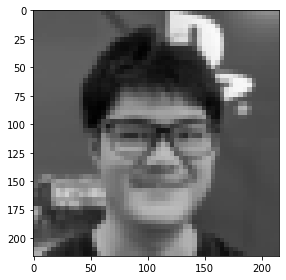

In [4]:
#空間解析
x4 = tr.rescale(tr.rescale(c,0.25),4,order =0)
sk.io.imshow(x4)

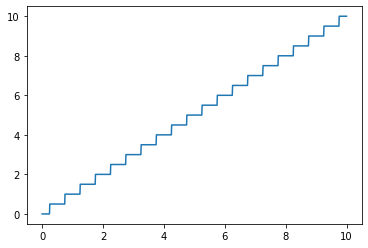

In [5]:
#量化
q = 0.5
x = np.linspace(0, 10, 1000)
#round:四捨五入
y = q * np.round(x/q)
plt.plot(x,y)



In [6]:
#量化與混色
#range(16):1個list[]:值是0~15
#形狀: 4*4
y = img_as_ubyte(16*np.reshape(range(16),(4,4)))
print(y)
z=y//64
print(z)


[[  0  16  32  48]
 [ 64  80  96 112]
 [128 144 160 176]
 [192 208 224 240]]
[[0 0 0 0]
 [1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]]


C:\Users\choug\anaconda3\lib\site-packages\skimage\util\dtype.py:503: UserWarning: Downcasting int32 to uint8 without scaling because max value 240 fits in uint8
  return convert(image, np.uint8, force_copy)


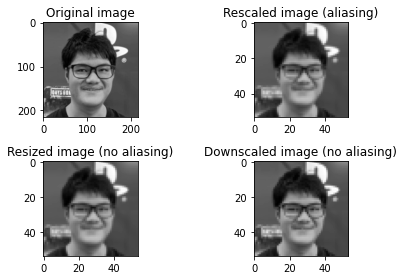

In [7]:
#rescale grey scale

#變成1/4大小
image_rescaled = rescale(c, 0.25)

#長 寬 各除4
image_resized = resize(c, (c.shape[0] // 4, c.shape[1] // 4))

#
image_downscaled = downscale_local_mean(c, (4, 4))
fig, axes = plt.subplots(nrows=2, ncols=2)
ax = axes.ravel()
ax[0].imshow(c, cmap='gray')
ax[0].set_title("Original image")
ax[1].imshow(image_rescaled, cmap='gray')
ax[1].set_title("Rescaled image (aliasing)")
ax[2].imshow(image_resized, cmap='gray')
ax[2].set_title("Resized image (no aliasing)")
ax[3].imshow(image_downscaled, cmap='gray')
ax[3].set_title("Downscaled image (no aliasing)")

plt.tight_layout()
plt.show()

C:\Users\choug\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


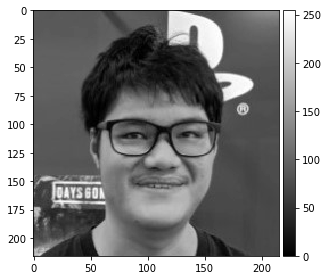

In [8]:
cResized= resize(c, (216, 216),
                       anti_aliasing=True)
cResized=cResized*255
io.imshow(cResized, cmap = 'gray')

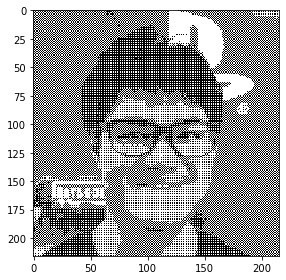

In [9]:
#混色
D=np.array(([[0,128],[192,64]]))
r = numpy.matlib.repmat(D, c.shape[0] // 2,c.shape[1]//2)
X2 = c > r
io.imshow(X2)


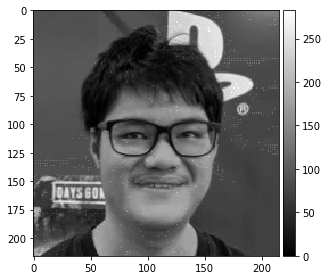

In [10]:
#4灰階影像混色
D =  np.array([[0,24],[36,12]])
r = np.matlib.repmat(D, c.shape[0] // 2,c.shape[1]//2)
q= c/37
X8 = q + (c -37*q > r)
io.imshow(X8*37, cmap = 'gray')


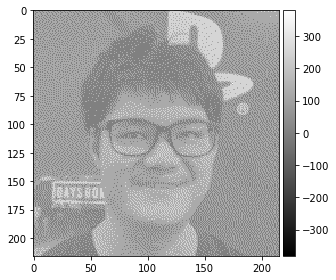

In [11]:
#誤差擴散法
def error_diffusion( pixel, k ):
  """ Diffuse on a single channel, using Floyd-Steinberg kerenl.
      @param pixel PIL PixelAccess object.
      @param size A tuple to represent the size of pixel.
  """
  rs, cs = pixel.shape
  ed = np.array([[0,0,7],[3,5,1]]) / 16.0
  z= np.zeros((rs+2, cs+2))
  z[1:rs+1, 1:cs+1] = pixel
  for i in range(1, rs+1):
    for j in range(1, cs+1):
      old = z[i, j]
      new = (old // (255//k))*(255 //(k-1))
      z[i,j] = new
      E = old -new
      z[i:i+2,j-1:j+2] = z[i:i+2,j-1:j+2] +E*ed
  return(z[1:rs+1,1:cs+1])


K=3
res = error_diffusion(c, K )
io.imshow(res, cmap = 'gray')


